<a href="https://colab.research.google.com/github/NsiriRoua/Human-Motion-Analysis-for-Fitness-Health/blob/main/Human_Motion_Analysis_for_Fitness_%26_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Building the classification model 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D,Flatten,Dense,Dropout,BatchNormalization

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.applications import VGG16,VGG19,InceptionResNetV2
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES=True

In [2]:
train_dir='/content/drive/MyDrive/Human Motion Analysis for Fitness & Health/DATASET/TRAIN'
test_dir='/content/drive/MyDrive/Human Motion Analysis for Fitness & Health/DATASET/TEST'

In [4]:
img=cv2.imread('/content/drive/MyDrive/Human Motion Analysis for Fitness & Health/DATASET/TEST/downdog/00000002.jpg')
img.shape

(1620, 2224, 3)

In [3]:
#Data augmentation
train_datagen=ImageDataGenerator(width_shift_range=0.1,
                                 horizontal_flip=True,
                                 rescale=1./255,
                                 validation_split=0.2)
test_datagen=ImageDataGenerator(rescale=1./255,
                                validation_split=0.2)

In [4]:
train_generator=train_datagen.flow_from_directory(directory=train_dir,target_size=(224,224),color_mode='rgb',class_mode='categorical',batch_size=16,subset='training')

Found 866 images belonging to 5 classes.


In [5]:
validation_generator=test_datagen.flow_from_directory(directory=test_dir,target_size=(224,224),color_mode='rgb',class_mode='categorical',batch_size=16,subset='validation')

Found 92 images belonging to 5 classes.


# **VGG19 :**

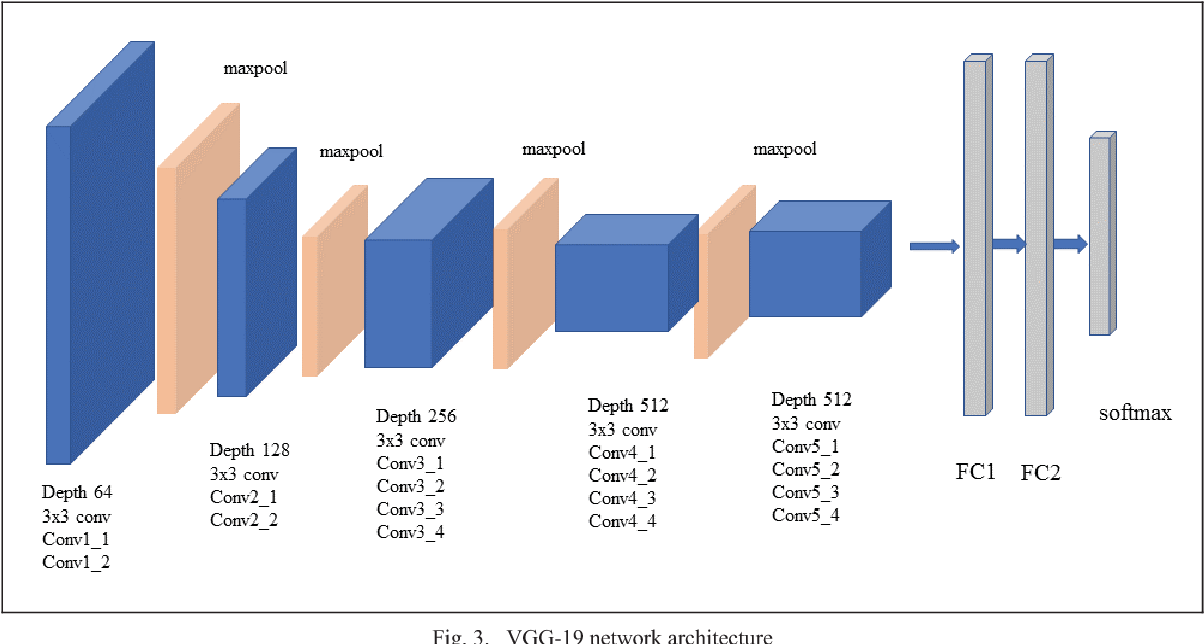

In [ ]:
img1=cv2.imread('/content/drive/MyDrive/Human Motion Analysis for Fitness & Health/DATASET/TEST/downdog/00000000.jpg')
img1.shape

(720, 1280, 3)

In [6]:
#Building the model using VGG19 pretrained on Imagenet , delete the top
model=tf.keras.Sequential()
model.add(VGG19(include_top=False,weights='imagenet',input_shape=(224,224,3)))
#Add Flatten layer before the classification Layer
model.add(Flatten())
#Add the classification Layer  
model.add(Dense(5,activation='softmax'))

80150528/80134624 [==============================] - 1s 0us/step


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 5)                 125445    
                                                                 
Total params: 20,149,829
Trainable params: 20,149,829
Non-trainable params: 0
_________________________________________________________________


In [8]:
#Compile 
optimizer=Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [9]:
batch_size=16
epochs=25

In [ ]:
#Fit
history=model.fit(train_generator,epochs=epochs,validation_data=validation_generator)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


55/55 [==============================] - 269s 4s/step - loss: 1.1497 - accuracy: 0.5462 - val_loss: 0.4434 - val_accuracy: 0.8370
Epoch 2/25
55/55 [==============================] - 40s 726ms/step - loss: 0.6657 - accuracy: 0.7702 - val_loss: 0.1543 - val_accuracy: 0.9565
Epoch 3/25
 6/55 [==>...........................] - ETA: 33s - loss: 0.4159 - accuracy: 0.8542

In [ ]:
model.save('YogaNet_Model_2_VGG19.h5')

In [ ]:
fig,ax=plt.subplot(1,2)


# **Inception ResNet V2**

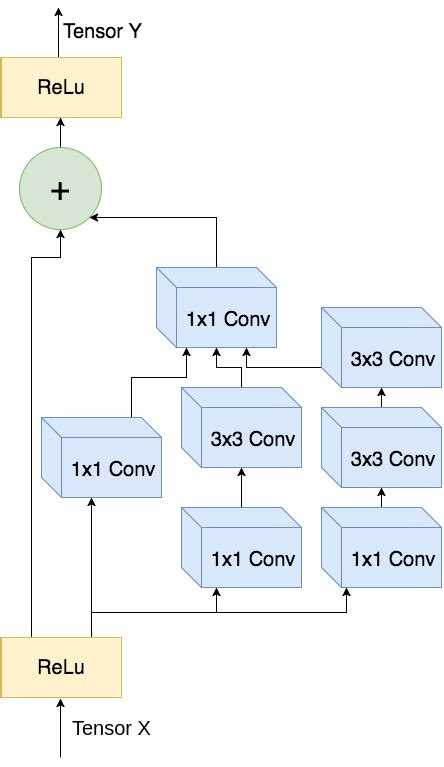

In [ ]:
#The model 
model2=tf.keras.Sequential()
model2.add(InceptionResNetV2(include_top=False,weights='imagenet',input_shape=(224,224,3)))
model2.add(Flatten())
model2.add(Dense(5,activation='softmax'))

219070464/219055592 [==============================] - 6s 0us/step


In [ ]:
#Compile
optimizer=Adamax()
model2.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
#Fit
history=model2.fit(train_generator,batch_size=16,epochs=25,validation_data=validation_generator)

Epoch 1/25
 2/55 [>.............................] - ETA: 43s - loss: 4.0515 - accuracy: 0.2500  

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


55/55 [==============================] - 511s 8s/step - loss: 1.4569 - accuracy: 0.6905 - val_loss: 0.2374 - val_accuracy: 0.8804
Epoch 2/25
55/55 [==============================] - 51s 916ms/step - loss: 0.5331 - accuracy: 0.8949 - val_loss: 0.2364 - val_accuracy: 0.9565
Epoch 3/25
55/55 [==============================] - 51s 918ms/step - loss: 0.2436 - accuracy: 0.9434 - val_loss: 0.0481 - val_accuracy: 0.9891
Epoch 4/25
55/55 [==============================] - 51s 924ms/step - loss: 0.1005 - accuracy: 0.9734 - val_loss: 0.2851 - val_accuracy: 0.9674
Epoch 5/25
55/55 [==============================] - 51s 921ms/step - loss: 0.0533 - accuracy: 0.9850 - val_loss: 0.1060 - val_accuracy: 0.9674
Epoch 6/25
55/55 [==============================] - 50s 913ms/step - loss: 0.0715 - accuracy: 0.9850 - val_loss: 0.2182 - val_accuracy: 0.9674
Epoch 7/25
55/55 [==============================] - 51s 926ms/step - loss: 0.0598 - accuracy: 0.9815 - val_loss: 0.2453 - val_accuracy: 0.9674
Epoch 8/25
5

In [ ]:
model2.save('fitness_health_inceptionv2.h5')

In [5]:
import cv2
import numpy as np
import os
def resize_image(img, size):

    h, w , v = img.shape
    c = img.shape[2] if len(img.shape)>2 else 1

    if h == w:
        return cv2.resize(img, size, cv2.INTER_AREA)

    dif = h if h > w else w

    interpolation = cv2.INTER_AREA if dif > (size[0]+size[1])//2 else cv2.INTER_CUBIC

    x_pos = (dif - w)//2
    y_pos = (dif - h)//2

    if len(img.shape) == 2:
        mask = np.zeros((dif, dif), dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w] = img[:h, :w]
    else:
        mask = np.zeros((dif, dif, c), dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w, :] = img[:h, :w, :]

    return cv2.resize(mask, size, interpolation)



In [12]:
src_path = '/content/drive/MyDrive/Human Motion Analysis for Fitness & Health/DATASET/TRAIN/downdog/'
dst_path = '/content/drive/MyDrive/Human Motion Analysis for Fitness & Health/resized_images/TRAIN/downdog/'


In [14]:
 files = os.listdir(src_path)
 for file in files:
   #print(file)
   print(src_path+file)

/content/drive/MyDrive/Human Motion Analysis for Fitness & Health/DATASET/TRAIN/downdog/00000129.jpg
/content/drive/MyDrive/Human Motion Analysis for Fitness & Health/DATASET/TRAIN/downdog/00000128.jpg
/content/drive/MyDrive/Human Motion Analysis for Fitness & Health/DATASET/TRAIN/downdog/00000132.png
/content/drive/MyDrive/Human Motion Analysis for Fitness & Health/DATASET/TRAIN/downdog/00000131.jpg
/content/drive/MyDrive/Human Motion Analysis for Fitness & Health/DATASET/TRAIN/downdog/00000130.jpg
/content/drive/MyDrive/Human Motion Analysis for Fitness & Health/DATASET/TRAIN/downdog/00000219.jpg
/content/drive/MyDrive/Human Motion Analysis for Fitness & Health/DATASET/TRAIN/downdog/00000154.jpg
/content/drive/MyDrive/Human Motion Analysis for Fitness & Health/DATASET/TRAIN/downdog/00000351.png
/content/drive/MyDrive/Human Motion Analysis for Fitness & Health/DATASET/TRAIN/downdog/00000287.png
/content/drive/MyDrive/Human Motion Analysis for Fitness & Health/DATASET/TRAIN/downdog/000

In [16]:
 files = os.listdir(src_path)
 for file in files:
   print(file)
   f_path= src_path+file
   img = cv2.imread(f_path)
   img = resize_image(img,size=(750,750))
   cv2.imwrite(dst_path+file,img)


00000129.jpg
00000128.jpg
00000132.png
00000131.jpg
00000130.jpg
00000219.jpg
00000154.jpg
00000351.png
00000287.png
00000342.jpg
00000230.jpg
00000229.jpg
00000152.jpg
00000194.jpg
00000238.jpg
00000208.jpg
00000241.jpg
00000226.JPG
00000343.jpg
00000357.jpg
00000212.png
00000203.png
00000299.jpg
00000179.jpg
00000143.jpg
00000232.jpg
00000133.jpg
00000332.jpg
00000153.jpg
00000160.jpg
00000156.jpg
00000183.jpg
00000168.jpg
00000305.png
00000186.png
00000335.jpg
00000276.jpg
00000320.jpg
00000283.jpg
00000284.jpg
00000221.jpg
00000223.jpg
00000348.jpg
00000204.jpg
00000176.jpg
00000198.png
00000277.jpg
00000235.jpg
00000309.jpg
00000310.png
00000352.png
00000346.jpg
00000228.png
00000214.jpg
00000248.jpg
00000177.jpg
00000222.jpg
00000188.png
00000197.jpg
00000264.jpg
00000345.png
00000182.jpg
00000209.jpg
00000166.jpg
00000303.jpg
00000224.jpg
00000147.jpg
00000134.jpg
00000162.jpg
00000210.jpg
00000355.jpg
00000225.jpg
00000338.jpg
00000158.jpg
00000145.jpg
00000272.jpg
00000170.jpg